In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#reading data
dataset= pd.read_csv("C:/Users/shudh/OneDrive/Desktop/ML_OPS/data/student_performance.csv", sep="\t")
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df=dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#shape of the dataset
df.shape

(1000, 8)

In [6]:
#data checks to perform

#missing values
#check duplicates
#check data types
#check the number of unqiue values of each column
#check statistics of dataset
#check various categories present in the diffrent categorical columns



In [7]:
#missing values

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
#check the number of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
#check statistics of the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
#define numerical_features and categorical_features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

print(numerical_features)
print(categorical_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [17]:
#adding total marks and average marks

#feature engineering
df['total_score']= df['math score'] + df['reading score'] + df['writing score']
df['average_score']=df['total_score']/3

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
df[df['math score'] == 100]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
451,female,group E,some college,standard,none,100,92,97,289,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
623,male,group A,some college,standard,completed,100,96,86,282,94.000000
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000


In [31]:
df[df['math score'] == 100]['math score']

149    100
451    100
458    100
623    100
625    100
916    100
962    100
Name: math score, dtype: int64

In [32]:
# number of 100 scored in three columns
reading_full=df[df['reading score'] == 100]['average_score'].count()
writing_full=df[df['writing score'] == 100]['average_score'].count()
math_full=df[df['math score'] == 100]['average_score'].count()

print("reading full count",reading_full)
print("writing full count",writing_full)
print("math full count",math_full)

reading full count 17
writing full count 14
math full count 7


In [33]:
#number of students who scored less than 20 in three columns
reading_less_20 = df[df['reading score'] <= 20]['reading score'].count()
writing_less_20 = df[df['writing score'] <= 20]['writing score'].count()
math_less_20 = df[df['math score'] <=20]['math score'].count()

print("students score less than 20 in reading", reading_less_20)
print("students score less than 20 in writing", writing_less_20)
print("students score less than 20 in math", math_less_20)

students score less than 20 in reading 1
students score less than 20 in writing 3
students score less than 20 in math 4


In [34]:
#insighs

#best performance in reading
#worst performance in maths


<Axes: xlabel='average_score', ylabel='Count'>

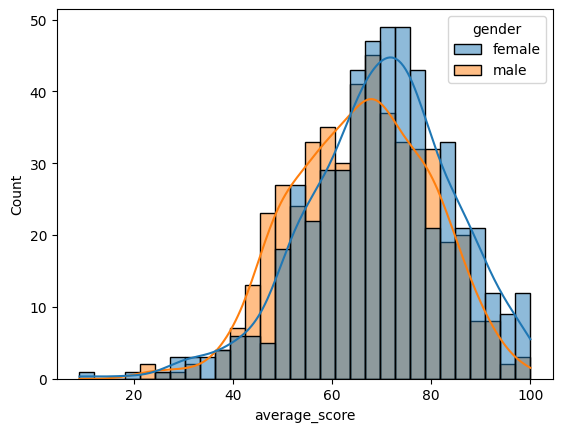

In [35]:
sns.histplot(data=df, x="average_score", bins=30, hue='gender', kde=True)

In [ ]:
#from above histogram, female tend to perform bettter than male students
